# Ultra Cold Ions Exercise

### Daten von txt in csv umwandeln

In [2]:
import os
import pandas as pd

def txt_to_csv(directory):
    # Gehe durch alle Dateien im angegebenen Verzeichnis
    for filename in os.listdir(directory):
        # Prüfe, ob die Datei eine .txt-Datei ist
        if filename.endswith(".txt"):
            # Erstelle den vollständigen Dateipfad
            txt_file_path = os.path.join(directory, filename)
            # Erstelle den Pfad für die neue CSV-Datei
            csv_file_path = os.path.join(directory, filename.replace(".txt", ".csv"))
            
            # Lese die .txt-Datei und speichere sie als DataFrame
            try:
                # Hier wird angenommen, dass die Textdateien durch Leerzeichen oder Tabs getrennt sind
                df = pd.read_csv(txt_file_path, delimiter=r'\s+')
                # Speichere den DataFrame als CSV
                df.to_csv(csv_file_path, index=False)
                print(f"Erfolgreich umgewandelt: {filename} -> {filename.replace('.txt', '.csv')}")
            except Exception as e:
                print(f"Fehler beim Verarbeiten der Datei {filename}: {e}")

# Verzeichnis, das die .txt-Dateien enthält
directory = "C:\\Users\\samse\\Desktop\\Blockkurs\\07-UltracoldIons\\Übung"  # Ersetze dies durch deinen Ordnerpfad

# Führe die Funktion aus
txt_to_csv(directory)


Erfolgreich umgewandelt: profile_1.txt -> profile_1.csv
Erfolgreich umgewandelt: profile_2.txt -> profile_2.csv
Erfolgreich umgewandelt: profile_3.txt -> profile_3.csv


### Read the csv files

In [2]:
import os
import pandas as pd

def read_csv_files(directory):
    # Gehe durch alle Dateien im angegebenen Verzeichnis
    for filename in os.listdir(directory):
        # Prüfe, ob die Datei eine .csv-Datei ist
        if filename.endswith(".csv"):
            # Erstelle den vollständigen Dateipfad
            csv_file_path = os.path.join(directory, filename)
            
            try:
                # Lese die CSV-Datei mit pandas
                df = pd.read_csv(csv_file_path)
                
                # Zeige die ersten 5 Zeilen der CSV-Datei an
                print(f"Erste 5 Zeilen der Datei {filename}:")
                print(df.head())
                print("\n" + "="*50 + "\n")
            except Exception as e:
                print(f"Fehler beim Verarbeiten der Datei {filename}: {e}")


directory = "C:\\Users\\samse\\Desktop\\Blockkurs\\07-UltracoldIons\\Übung"  # Ersetze dies durch deinen Ordnerpfad

read_csv_files(directory)


Erste 5 Zeilen der Datei profile_1.csv:
                                          Frequency,  Intensity
0  -3.500000000000000000e+00,-4.70320030655745555...        NaN
1  -3.459919839679358233e+00,-1.55132332904544239...        NaN
2  -3.419839679358718243e+00,-9.64065637825740895...        NaN
3  -3.379759519038076476e+00,2.652867145873966798...        NaN
4  -3.339679358717434710e+00,-9.14543067303300455...        NaN


Erste 5 Zeilen der Datei profile_2.csv:
                                          Frequency,  Intensity
0  -1.500000000000000000e+01,3.256569890322191796...        NaN
1  -1.495991983967935823e+01,3.386976254996505731...        NaN
2  -1.491983967935871824e+01,-1.37587688638254549...        NaN
3  -1.487975951903807648e+01,1.610773832878861431...        NaN
4  -1.483967935871743471e+01,1.971004511244714777...        NaN


Erste 5 Zeilen der Datei profile_3.csv:
                                          Frequency,  Intensity
0  -8.500000000000000000e+00,7.5707458099034

### Plot the functions and fit a GAUSSIAN and a LORENTZIAN

Verarbeite Datei: profile_1.txt
   Frequency   Intensity
0  -3.500000   -0.047032
1  -3.459920   -0.015513
2  -3.419840   -0.009641
3  -3.379760    0.026529
4  -3.339679   -0.091454


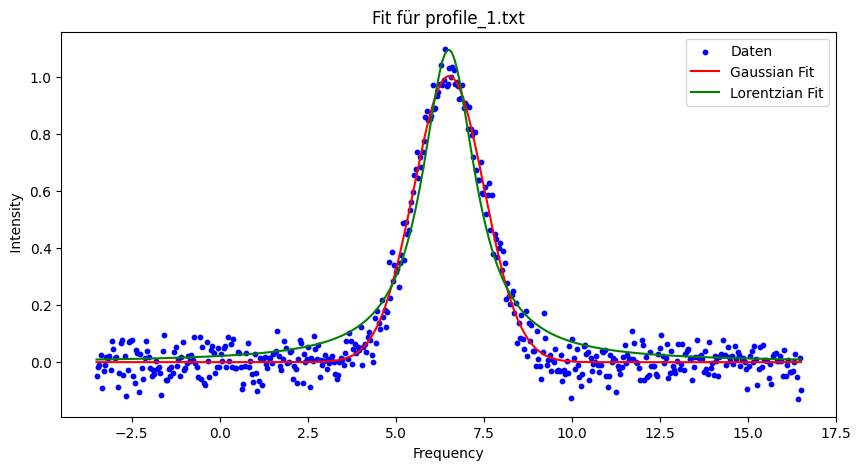

Verarbeite Datei: profile_2.txt
   Frequency   Intensity
0 -15.000000    0.032566
1 -14.959920    0.033870
2 -14.919840   -0.013759
3 -14.879760    0.016108
4 -14.839679    0.019710


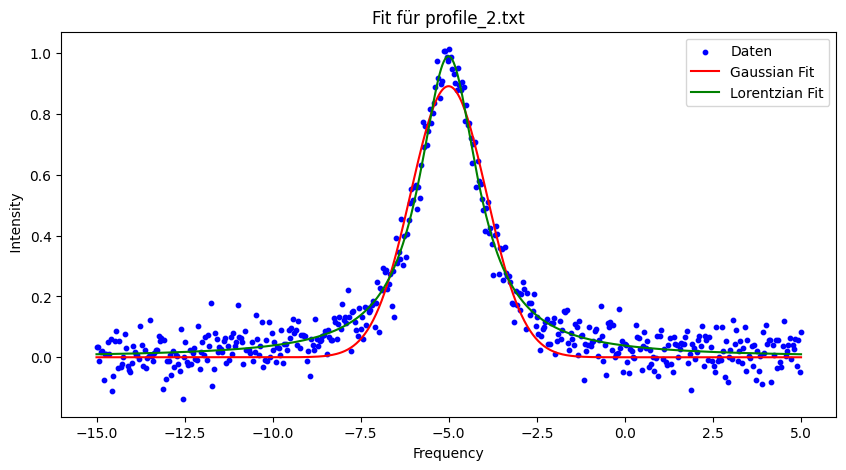

Verarbeite Datei: profile_3.txt
   Frequency   Intensity
0  -8.500000    0.075707
1  -8.459920   -0.068262
2  -8.419840    0.046658
3  -8.379760    0.017469
4  -8.339679    0.030747


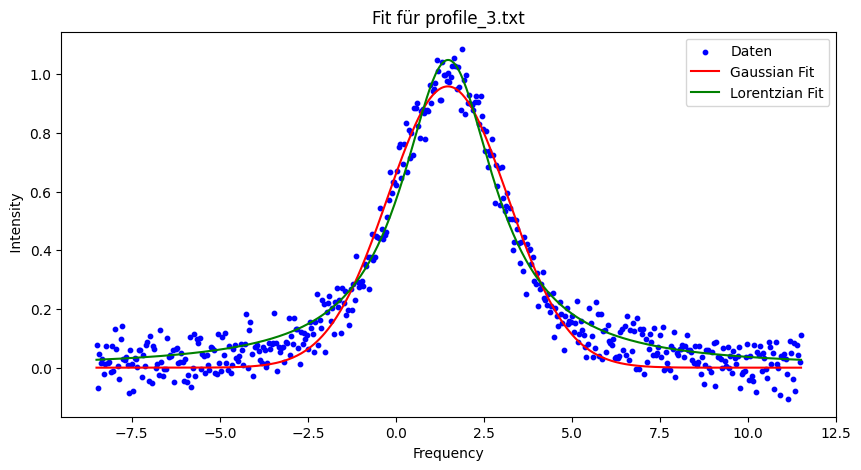

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian-Funktion
def gaussian(x, amp, cen, width):
    return amp * np.exp(-(x - cen)**2 / (2 * width**2))

# Lorentzian-Funktion
def lorentzian(x, amp, cen, width):
    return amp * (1 / (1 + ((x - cen) / width)**2))

def plot_and_fit_files(directory):
    """Liest .csv- und .txt-Dateien aus einem Ordner, plottet die Daten und fitted Gaussian- und Lorentz-Funktion."""
    
    for filename in os.listdir(directory):
        if filename.endswith((".txt")):  # Jetzt werden beide Formate gelesen
            file_path = os.path.join(directory, filename)
            
            try:
                # Datei einlesen mit automatischer Trennzeichenerkennung
                df = pd.read_csv(file_path, header=0, sep=None, engine="python")

                # Konvertiere erste und zweite Spalte in Zahlen
                df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')
                df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors='coerce')

                # Entferne Zeilen mit NaN-Werten (z. B. leere Zeilen)
                df = df.dropna()

                # Falls keine Daten übrig bleiben, überspringen
                if df.empty:
                    print(f"Überspringe Datei {filename}, da keine gültigen Daten vorhanden sind.")
                    continue

                # X- und Y-Daten extrahieren
                x_data = df.iloc[:, 0].values
                y_data = df.iloc[:, 1].values

                # Debugging: Zeige erste Zeilen
                print(f"Verarbeite Datei: {filename}")
                print(df.head())

                # Plot der Originaldaten
                plt.figure(figsize=(10, 5))
                plt.scatter(x_data, y_data, label="Daten", color="blue", s=10)

                # Fit mit Gaussian
                try:
                    popt_gaussian, _ = curve_fit(gaussian, x_data, y_data, p0=[max(y_data), np.mean(x_data), 1])
                    plt.plot(x_data, gaussian(x_data, *popt_gaussian), label="Gaussian Fit", color="red")
                except RuntimeError:
                    print(f"⚠ Gaussian Fit fehlgeschlagen für {filename}")

                # Fit mit Lorentzian
                try:
                    popt_lorentzian, _ = curve_fit(lorentzian, x_data, y_data, p0=[max(y_data), np.mean(x_data), 1])
                    plt.plot(x_data, lorentzian(x_data, *popt_lorentzian), label="Lorentzian Fit", color="green")
                except RuntimeError:
                    print(f"⚠ Lorentzian Fit fehlgeschlagen für {filename}")

                # Achsenbeschriftung und Titel setzen
                plt.xlabel(df.columns[0])  # Erste Spalte als X-Achsenbeschriftung
                plt.ylabel(df.columns[1])  # Zweite Spalte als Y-Achsenbeschriftung
                plt.title(f"Fit für {filename}")
                plt.legend()
                plt.show()

            except Exception as e:
                print(f"❌ Fehler beim Verarbeiten der Datei {filename}: {e}")

# Ordner mit den Dateien (Pfad anpassen)
directory = "C:\\Users\\samse\\Desktop\\Blockkurs\\07-UltracoldIons\\Übung"

# Funktion ausführen
plot_and_fit_files(directory)



### What is the better fit.

profile_1: Gaussian 

profile_2: Lorentzian 

profile_3: Lorentzian VOIGTprofile, neighter lorentzian nor gaussian




### Error formula

#### Gaussian

$f(x) = A \exp(- \frac{(x - x_0)^2}{2 \sigma ^2})$

$\sigma$ = full with half max (FWHM)

#### Lorentzian

$f(x) = \frac{A}{1 + (\frac{x - x_0}{\gamma})^2}$

$\gamma$ = half with half max (HWHM)
$2 \cdot \gamma$ = FWHM

### Plot LAURENTZIAN and GAUSSIAN with errors and x values

<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\g'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\g'
C:\Users\samse\AppData\Local\Temp\ipykernel_32244\1276242418.py:42: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_data, y_fit_gauss, label=f"Gaussian Fit\n$f_0$ = {popt_gaussian[1]:.2f} ± {errors_gauss[1]:.2f}, $\sigma$ = {popt_gaussian[2]:.2f} ± {errors_gauss[2]:.2f}", color="red")
C:\Users\samse\AppData\Local\Temp\ipykernel_32244\1276242418.py:51: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(x_data, y_fit_lorentz, label=f"Lorentzian Fit\n$f_0$ = {popt_lorentzian[1]:.2f} ± {errors_lorentz[1]:.2f}, $\gamma$ = {popt_lorentzian[2]:.2f} ± {errors_lorentz[2]:.2f}", color="green")


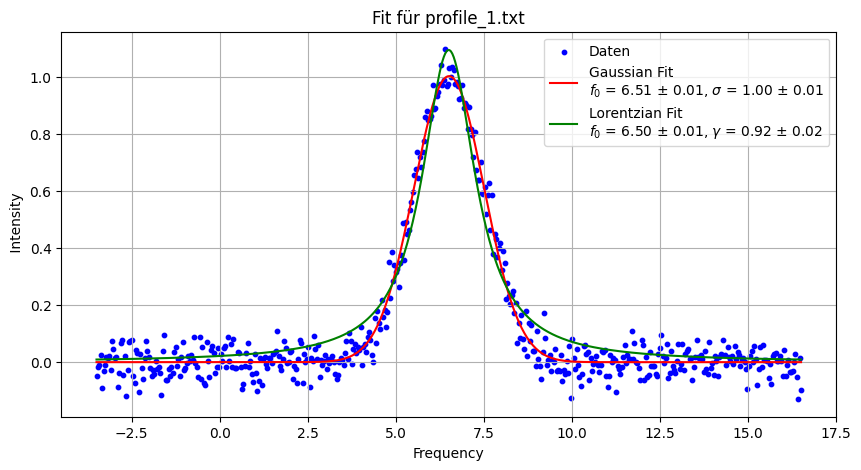

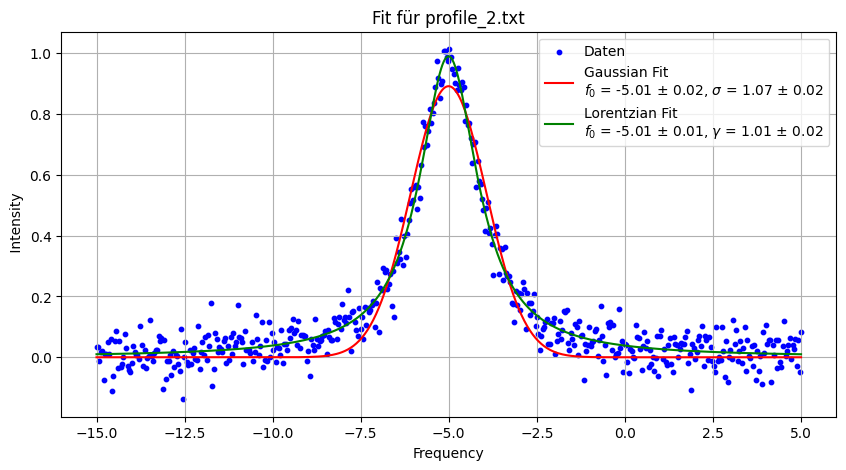

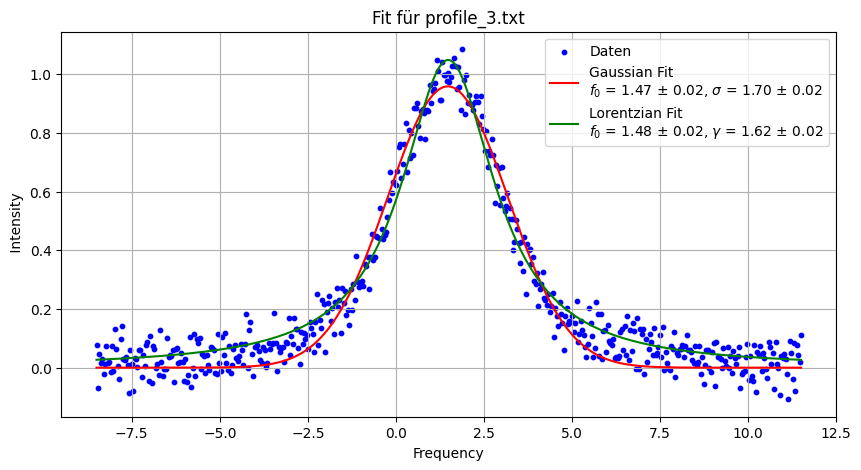

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Gaussian-Funktion
def gaussian(x, amp, cen, width):
    return amp * np.exp(-(x - cen)**2 / (2 * width**2))

# Lorentzian-Funktion
def lorentzian(x, amp, cen, width):
    return amp * (1 / (1 + ((x - cen) / width)**2))

def plot_and_fit_files(directory):
    """Liest .txt-Dateien aus einem Ordner, plottet die Daten und fitted Gaussian- und Lorentz-Funktion."""
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # Nur .txt-Dateien verarbeiten
            file_path = os.path.join(directory, filename)
            
            try:
                df = pd.read_csv(file_path, header=0, sep=None, engine="python")
                df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')
                df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors='coerce')
                df = df.dropna()
                if df.empty:
                    print(f"Überspringe Datei {filename}, da keine gültigen Daten vorhanden sind.")
                    continue

                x_data = df.iloc[:, 0].values
                y_data = df.iloc[:, 1].values

                plt.figure(figsize=(10, 5))
                plt.scatter(x_data, y_data, label="Daten", color="blue", s=10)

                # Fit mit Gaussian
                try:
                    popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data, y_data, p0=[max(y_data), np.mean(x_data), 1])
                    y_fit_gauss = gaussian(x_data, *popt_gaussian)
                    errors_gauss = np.sqrt(np.diag(pcov_gaussian))
                    plt.plot(x_data, y_fit_gauss, label=f"Gaussian Fit\n$f_0$ = {popt_gaussian[1]:.2f} ± {errors_gauss[1]:.2f}, $\sigma$ = {popt_gaussian[2]:.2f} ± {errors_gauss[2]:.2f}", color="red")
                except RuntimeError:
                    print(f"⚠ Gaussian Fit fehlgeschlagen für {filename}")

                # Fit mit Lorentzian
                try:
                    popt_lorentzian, pcov_lorentzian = curve_fit(lorentzian, x_data, y_data, p0=[max(y_data), np.mean(x_data), 1])
                    y_fit_lorentz = lorentzian(x_data, *popt_lorentzian)
                    errors_lorentz = np.sqrt(np.diag(pcov_lorentzian))
                    plt.plot(x_data, y_fit_lorentz, label=f"Lorentzian Fit\n$f_0$ = {popt_lorentzian[1]:.2f} ± {errors_lorentz[1]:.2f}, $\gamma$ = {popt_lorentzian[2]:.2f} ± {errors_lorentz[2]:.2f}", color="green")
                except RuntimeError:
                    print(f"⚠ Lorentzian Fit fehlgeschlagen für {filename}")

                plt.xlabel(df.columns[0])
                plt.ylabel(df.columns[1])
                plt.title(f"Fit für {filename}")
                plt.legend()
                plt.grid()
                plt.show()

            except Exception as e:
                print(f"❌ Fehler beim Verarbeiten der Datei {filename}: {e}")

directory = "C:\\Users\\samse\\Desktop\\Blockkurs\\07-UltracoldIons\\Übung"
plot_and_fit_files(directory)